#Red Wine quality prediction project



Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



Data collection

In [ ]:
wine_ds = pd.read_csv('/content/winequality-red.csv') 

Loading the dataset to a Pandas DataFrame 

In [ ]:
wine_ds.shape

(1599, 12)

The dataset has 1599 rows and 12 columns

In [ ]:
#checking the column names and forst 5 rows 
wine_ds.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
#checking for null values in dataset
wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The Dataset has no missing values

## Data Analysis and Visualisation

In [ ]:
#checking the statistcis of the dataset
wine_ds.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

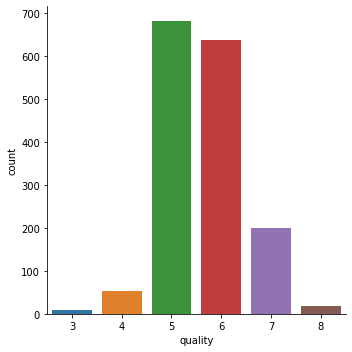

In [ ]:
# number or values for each qality
sns.catplot(x='quality', data = wine_ds, kind = 'count') 

As per the data we have 6 quality values (3 to 8) wherein 3 is the lowest and 8 is highest. The highest qualitribution is in quality value is for 5 and 6.

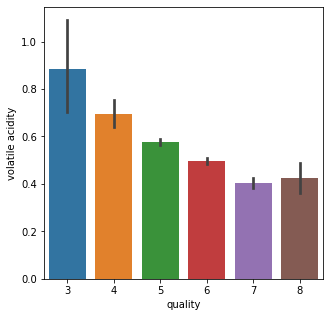

In [ ]:
#comparing a feature column with the target (quality) column
# volatile acidity vs  Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine_ds)

The plot shows that volatile acidity of the vine and qiality are inversely proportional. that is is volatile acidity is high the qine quality is low and vice versa. 

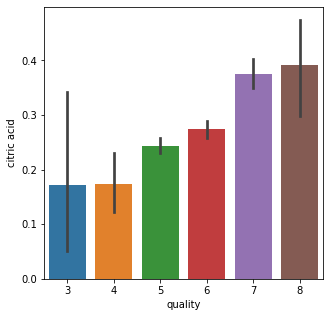

In [ ]:
# citric acid vs Quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_ds) 

This is opposite to the volatile acidity graph. that is the citric acid value of the vine and quality are directly proportional. 

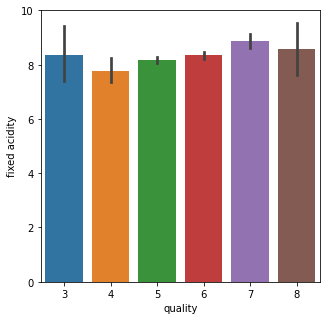

In [ ]:
# fixed acidity vs Quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data=wine_ds) 

We observe that fixed acidity does not have any significant influence on the wine quality

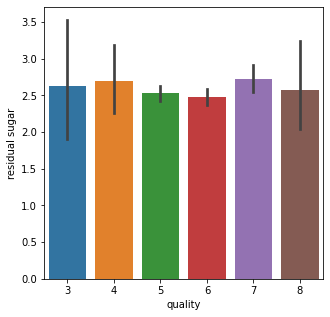

In [ ]:
# residual sugar vs Quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=wine_ds) 

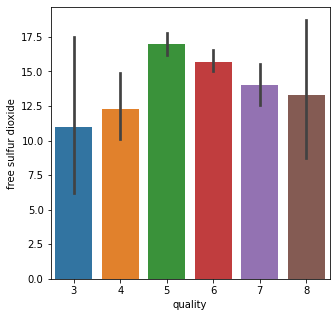

In [ ]:
#free sulfur dioxide vs Quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_ds)

##finding the correlation between columns of data

In [ ]:
corr = wine_ds.corr()

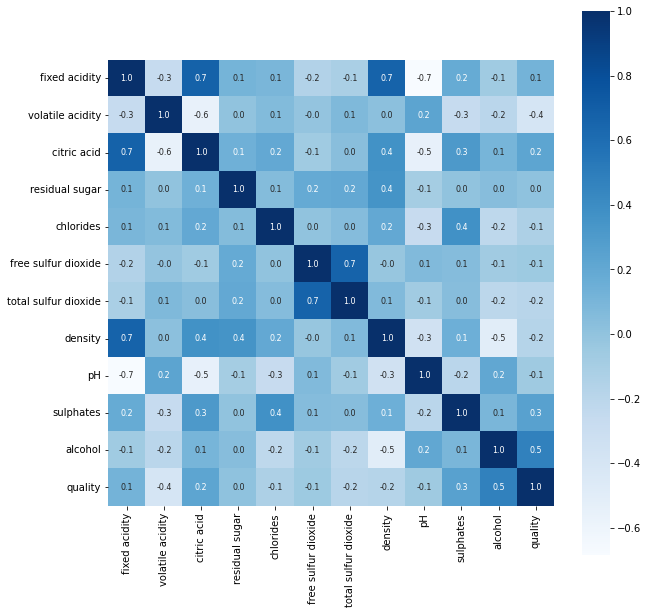

In [ ]:
#plotting a Heatmap to understand the correlation of data with columns
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap= 'Blues')

We see that the **Alcohol** proportion is highly *positively correlated* to the **quality** and **Volatile Acidity** is highly *negatively correlated* to it.

##Data Pre-processing

In [ ]:
#Seperating the data and Label

X = wine_ds.drop('quality', axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

The quality column is now seperated from the data

In [ ]:
#binarizing / encoding the target column)
Y = wine_ds ['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Performed normal encoding to binarize the quality column. This will make data easily readable by the algorithm 

##Train and Test split

In [ ]:
#Applying Train & Test split to our data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


1599 is our original data values, 1279 values for training and 320 values is for testing

##Model training (Random Forest Classifies)

In [ ]:
model = RandomForestClassifier() 

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The training data has been fit into the algorithm

##Model Evaluation via Accuracy score

In [ ]:
#accuracy of test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy Score is :', test_data_accuracy)

Accuracy Score is : 0.921875


###With Random Forest classifier we got an accuracy score of 93%




Now we can try building a predictive system

In [ ]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# Changing teh input data to a Numpy Array
input_data_as_np_array = np.asarray(input_data)

# reshaping the data as we are predicting the value for one instance only
input_data_reshaped =  input_data_as_np_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
  print('Good quality wine')

else:
  print('Bad quality wine') 

[1]
Good quality wine


In [ ]:
# Checking with diferrent values 
input_data = (8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3)

# Changing the input data to a Numpy Array
input_data_as_np_array = np.asarray(input_data)

# reshaping the data as we are predicting the value for one instance only
input_data_reshaped =  input_data_as_np_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
  print('Good quality wine')

else:
  print('Bad quality wine') 

[0]
Bad quality wine
